In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')

In [4]:
test = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')

In [5]:
train.shape, test.shape

((9557, 143), (23856, 142))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [8]:
# False -> 0, True -> 1
train[['Id']].isnull().sum()

Id    0
dtype: int64

In [9]:
train[['hacdor']].isnull().sum()

hacdor    0
dtype: int64

In [10]:
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

In [11]:
train = train.dropna(axis='columns')
train.columns, len(train.columns)

(Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
        'r4h2', 'r4h3',
        ...
        'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
       dtype='object', length=138),
 138)

In [12]:
train.isnull().sum()

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
paredother         0
pisomoscer         0
pisocemento        0
pisoother          0
pisonatur          0
pisonotiene        0
pisomadera         0
techozinc          0
techoentrepiso     0
techocane          0
techootro          0
cielorazo          0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
public             0
planpri            0
noelec             0
coopele            0
sanitario1         0
sanitario2   

In [13]:
train.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=138)

## choose columns : refrig, tamhog, hhsize, public, idhogar, dependency, hogar_total, overcrowding, bedrooms, agesq, Target


In [14]:
train_feature = train[['refrig', 'tamhog', 'hhsize', 'public', 'idhogar', 'dependency', 'hogar_total', 'overcrowding', 'bedrooms', 'agesq']]
train_feature.head(3)

,refrig,tamhog,hhsize,public,idhogar,dependency,hogar_total,overcrowding,bedrooms,agesq
0,1,1,1,1,21eb7fcc1,no,1,1.0,1,1849
1,1,1,1,1,0e5d7a658,8,1,1.0,1,4489
2,1,1,1,1,2c7317ea8,8,1,0.5,2,8464


In [15]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   refrig        9557 non-null   int64  
 1   tamhog        9557 non-null   int64  
 2   hhsize        9557 non-null   int64  
 3   public        9557 non-null   int64  
 4   idhogar       9557 non-null   object 
 5   dependency    9557 non-null   object 
 6   hogar_total   9557 non-null   int64  
 7   overcrowding  9557 non-null   float64
 8   bedrooms      9557 non-null   int64  
 9   agesq         9557 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 746.8+ KB


* 연속형 : refrig, public, dependency, overcrowding, bedrooms, 
* 분류형 : tamhog, hhsize,  hogar_total, 

In [16]:
train_feature['agesq'].value_counts()

529     189
256     180
324     179
400     179
900     178
289     175
361     170
484     166
441     163
784     159
729     157
576     156
169     154
225     153
36      150
1024    149
625     146
841     143
9       143
1444    143
196     142
49      140
81      140
144     139
676     139
2500    139
1764    139
16      139
100     138
64      136
2704    135
25      134
1225    133
121     133
1849    132
1296    132
2916    131
961     131
2809    130
1089    128
1521    126
1369    122
2025    121
1156    120
1       120
1600    118
2209    116
2304    116
4       116
3600    115
3249    115
3136    113
2401    111
2601    111
2116    111
3025    109
3844     99
0        99
1936     95
3364     94
3481     93
3969     88
4096     83
1681     82
3721     75
4356     69
4900     69
4489     68
4624     66
4225     63
4761     53
5184     52
5476     50
5329     43
5625     41
5776     39
6084     32
5041     30
5929     30
6400     28
6241     26
6889     24
6724     24
6561

In [17]:
train_feature = train_feature[['refrig', 'public', 'dependency', 'overcrowding', 'bedrooms','tamhog', 'hhsize', 'hogar_total']]
train_feature.shape

(9557, 8)

In [18]:
train_feature.head(3)

,refrig,public,dependency,overcrowding,bedrooms,tamhog,hhsize,hogar_total
0,1,1,no,1.0,1,1,1,1
1,1,1,8,1.0,1,1,1,1
2,1,1,8,0.5,2,1,1,1


In [19]:
train_feature['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
.80000001      18
1.25           18
3.5            18
2.25           13
.71428573      12
.83333331      11
.22222222      11
1.2            11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [20]:
train_feature['dependency'] = train_feature['dependency'].replace(to_replace='yes',value=2)

In [21]:
train_feature['dependency'] = train_feature['dependency'].replace(to_replace='no',value=6)

In [22]:
train_feature['dependency'].value_counts()

2            2192
6            1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
.80000001      18
1.25           18
3.5            18
2.25           13
.71428573      12
.83333331      11
.22222222      11
1.2            11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [23]:
train_feature.isnull().sum()

refrig          0
public          0
dependency      0
overcrowding    0
bedrooms        0
tamhog          0
hhsize          0
hogar_total     0
dtype: int64

In [24]:
train_feature.corr()            # corr() 는 그룹 별로 변수 간 상관관계 분석(correlation with columns by groups)    상관계수(Correlation Coefficient)
                                # 1 또는 -1에 가까울수록 상관관계가 높고 0에 가까울수록 상관관계가 낮다. 
                                # train_feature와 Target간의 상관관계를 알아볼 필요가 있다. 

,refrig,public,overcrowding,bedrooms,tamhog,hhsize,hogar_total
refrig,1.000000,0.064289,-0.113158,0.103223,-0.026784,-0.026784,-0.026784
public,0.064289,1.000000,-0.003372,0.021019,0.000179,0.000179,0.000179
overcrowding,-0.113158,-0.003372,1.000000,-0.392736,0.585560,0.585560,0.585560
bedrooms,0.103223,0.021019,-0.392736,1.000000,0.357266,0.357266,0.357266
tamhog,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hhsize,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hogar_total,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000


In [25]:
train_heatmap = pd.concat([train['Target'],train_feature], axis='columns')

In [26]:
train_heatmap.corr()

,Target,refrig,public,overcrowding,bedrooms,tamhog,hhsize,hogar_total
Target,1.000000,0.126792,0.009074,-0.289110,0.166943,-0.147642,-0.147642,-0.147642
refrig,0.126792,1.000000,0.064289,-0.113158,0.103223,-0.026784,-0.026784,-0.026784
public,0.009074,0.064289,1.000000,-0.003372,0.021019,0.000179,0.000179,0.000179
overcrowding,-0.289110,-0.113158,-0.003372,1.000000,-0.392736,0.585560,0.585560,0.585560
bedrooms,0.166943,0.103223,0.021019,-0.392736,1.000000,0.357266,0.357266,0.357266
tamhog,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hhsize,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hogar_total,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000


In [27]:
import seaborn as sns

<AxesSubplot:>

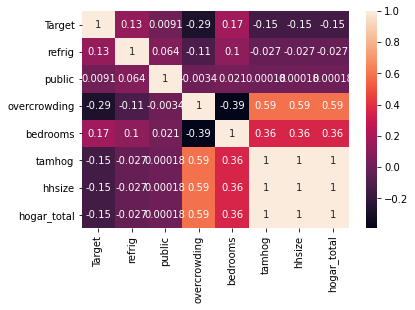

In [28]:
sns.heatmap(train_heatmap.corr(),annot=True)

In [29]:
train_onehot = pd.get_dummies(train_feature, columns=['tamhog', 'hhsize', 'hogar_total'])
# train_onehot

In [30]:
train_onehot.shape

(9557, 44)

In [31]:
from sklearn import preprocessing

In [32]:
scaler = preprocessing.StandardScaler()

In [33]:
scaler.fit(train_onehot)

StandardScaler()

In [34]:
X = scaler.transform(train_onehot)
X.shape

(9557, 44)

여기에서 data split을 해야 함. 나중에 할 것!!!

In [35]:
Y = train['Target']
Y.shape

(9557,)

### Apply GridSearchCV

In [36]:
from lightgbm import LGBMClassifier

In [37]:
lgbm = LGBMClassifier()

In [38]:
# class sklearn.model_selection.GridSearchCV(estimator, param_grid....)
from sklearn.model_selection import GridSearchCV  # GridSearchCV는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다.
                                                  # GridSearchCV(estimator, param_grid)

In [39]:
params = {'max_depth':[10,15,20],
         'min_child_samples':[20,40,60],
         'subsample':[0.8,1],
         }
# map(func, param01, param02)

In [40]:
grid = GridSearchCV(lgbm, param_grid=params)

In [41]:
grid.fit(X,Y)                   # 내부적으로는 여러번 돌린 것같은 효과가 있음

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'subsample': [0.8, 1]})

In [42]:
grid.best_score_, grid.best_params_  # 파리미터를 조정해서 돌린 것. 그런데 디폴트보다 적게 나왔으므로 파라미터를 다시 조정해야 함. 

(0.619021235787524,
 {'max_depth': 15, 'min_child_samples': 40, 'subsample': 0.8})

In [43]:
lgbm_grid = LGBMClassifier(max_depth=15, min_child_samples=40, subsample=0.8)
lgbm_grid.fit(X,Y)

LGBMClassifier(max_depth=15, min_child_samples=40, subsample=0.8)

In [44]:
lgbm_grid.score(X,Y)

0.6956157790101496

### Apply KFold
class sklearn.model_selection.RepeatedStratifiedKFold(*, n_splits=5, n_repeats=10, random_state=None)

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [46]:
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

### sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

* estimator : 모델을 뜻함
* KFold를 하지 않았으면 cv를 사용하면 됨. cv는 cross-validation의 약자
* scoring

In [47]:
from sklearn.model_selection import cross_val_score     # cross_val_score가 내부적으로 for문을 돌려서 score가 나오도록 해준다.  

In [48]:
n_scores = cross_val_score(lgbm_grid, X, Y, scoring='accuracy', cv=kf)

In [49]:
n_scores, n_scores.shape

(array([0.67677824, 0.67468619, 0.68096234, 0.67991632, 0.67573222,
        0.69351464, 0.66317992, 0.69319372, 0.67434555, 0.67853403,
        0.68514644, 0.68305439, 0.68200837, 0.67782427, 0.66841004,
        0.66945607, 0.68096234, 0.67643979, 0.67120419, 0.68691099,
        0.67259414, 0.69665272, 0.68619247, 0.67154812, 0.66631799,
        0.67573222, 0.67991632, 0.68272251, 0.68062827, 0.67853403,
        0.69142259, 0.68723849, 0.67154812, 0.67782427, 0.67991632,
        0.66736402, 0.67782427, 0.67120419, 0.68900524, 0.68272251,
        0.67259414, 0.67050209, 0.68619247, 0.66736402, 0.68723849,
        0.68096234, 0.68619247, 0.68586387, 0.68376963, 0.68795812]),
 (50,))

In [50]:
import numpy as np

In [51]:
np.mean(n_scores), np.std(n_scores)        # n_scores의 평균과 표준편차를 알아본다. 

(0.679356130473833, 0.007658862205094442)

In [52]:
lgbm_grid.feature_importances_

array([ 543,  789, 3249, 3300, 1780,  159,  310,  313,  466,  369,  249,
        161,  141,  104,   59,    8,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [53]:
from lightgbm import plot_importance

Index(['refrig', 'public', 'dependency', 'overcrowding', 'bedrooms',
       'tamhog_1', 'tamhog_2', 'tamhog_3', 'tamhog_4', 'tamhog_5', 'tamhog_6',
       'tamhog_7', 'tamhog_8', 'tamhog_9', 'tamhog_10', 'tamhog_11',
       'tamhog_12', 'tamhog_13', 'hhsize_1', 'hhsize_2', 'hhsize_3',
       'hhsize_4', 'hhsize_5', 'hhsize_6', 'hhsize_7', 'hhsize_8', 'hhsize_9',
       'hhsize_10', 'hhsize_11', 'hhsize_12', 'hhsize_13', 'hogar_total_1',
       'hogar_total_2', 'hogar_total_3', 'hogar_total_4', 'hogar_total_5',
       'hogar_total_6', 'hogar_total_7', 'hogar_total_8', 'hogar_total_9',
       'hogar_total_10', 'hogar_total_11', 'hogar_total_12', 'hogar_total_13'],
      dtype='object')


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

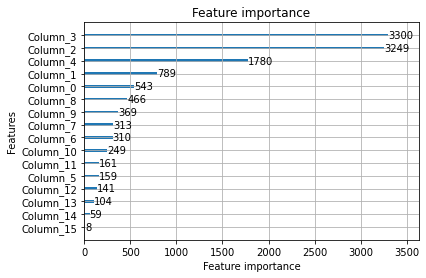

In [54]:
print(train_onehot.columns)
plot_importance(lgbm_grid)

In [55]:
Y_pred = lgbm_grid.predict(X)

In [56]:
from sklearn import metrics

In [57]:
print(metrics.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           1       0.78      0.26      0.39       755
           2       0.54      0.32      0.40      1597
           3       0.72      0.15      0.25      1209
           4       0.71      0.96      0.82      5996

    accuracy                           0.70      9557
   macro avg       0.69      0.42      0.46      9557
weighted avg       0.69      0.70      0.64      9557



In [58]:
lgbm.fit(X,Y)

LGBMClassifier()

In [59]:
lgbm.score(X,Y)

0.6987548393847441

In [60]:
Y_pred = lgbm.predict(X)

In [61]:
from sklearn import metrics

In [62]:
print(metrics.classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           1       0.78      0.27      0.40       755
           2       0.56      0.32      0.41      1597
           3       0.66      0.17      0.27      1209
           4       0.71      0.96      0.82      5996

    accuracy                           0.70      9557
   macro avg       0.68      0.43      0.47      9557
weighted avg       0.69      0.70      0.65      9557

